# Import Packages and Data. Identify the transactions in the 'transcript' data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transcript data
transcript = pd.read_pickle(r'data\02_stg\stg_transcript.pkl')

# Filter on transactions
transactions = transcript[transcript['event'] == 'transaction']

#Drop unneeded columns
transactions = transactions.drop(columns=['offer_id', 'event', 'reward'])

#Rename columns
transactions = transactions.rename(columns={'time_hrs': 'transaction'})

#Reset index
transactions = transactions.reset_index(drop=True)

#save the data
transactions.to_csv(r'data\03_int\int_transactions.csv', index=False)
transactions.to_pickle(r'data\03_int\int_transactions.pkl')

# Calculate the number of unique customers
num_customers = transactions['customer_id'].nunique()
print(f'There are {num_customers} unique customers in the dataset.')

#Sort data to see the highest transaction amounts
transactions.sort_values(by='transaction_amount', ascending=False, inplace=False).head()

There are 16578 unique customers in the dataset.


,customer_id,transaction,transaction_amount
58812,6cf884a6c5ae4b2daccb6d3108028fef,630,1062.28
37801,454b00bdd77c4f588eb9f6cafd81dc5d,690,1015.73
51385,5ecaea5c8bf44ae4a65838d9d066c909,102,1001.85
119948,dce784e26f294101999d000fad9089bb,372,989.34
44941,52959f19113e4241a8cb3bef486c6412,696,977.78


# Count and Sum Transactions per Customer Id

In [11]:
# Count transactions and sum transaction amounts per customer_id
transactions_per_cust = transactions.groupby('customer_id').agg(
    total_transactions=('transaction_amount', 'count'),
    total_transaction_amount=('transaction_amount', 'sum')
).reset_index().sort_values(by=['total_transactions', 'total_transaction_amount'], ascending=False)

transactions_per_cust.to_csv(r'data\04_fct\fct_transactions_per_cust.csv', index=False)
transactions_per_cust.to_pickle(r'data\04_fct\fct_transactions_per_cust.pkl')
transactions_per_cust.head()

,customer_id,total_transactions,total_transaction_amount
7887,79d9d4f86aca4bed9290350fb43817c2,36,173.41
9239,8dbfa485249f409aa223a2130f40634a,36,76.46
9702,94de646f7b6041228ca7dec82adb97d2,35,90.23
11652,b1f4ece7d49342628a9ed77aee2cde58,32,133.02
6118,5e60c6aa3b834e44b822ea43a3efea26,32,103.66


# Summarize the Data

In [12]:
unique_cust = transactions_per_cust['customer_id'].nunique()
print(f'There are {unique_cust} unique customers in the transactions data')

summary_df = pd.concat(
    [
        round(transactions_per_cust['total_transactions'].describe()), 
        round(transactions_per_cust['total_transaction_amount'].describe())
        ], 
    axis=1)

summary_df.to_csv(r'data\04_fct\fct_transactions_summary.csv')

summary_df

There are 16578 unique customers in the transactions data


,total_transactions,total_transaction_amount
count,16578.0,16578.0
mean,8.0,107.0
std,5.0,126.0
min,1.0,0.0
25%,5.0,24.0
50%,7.0,72.0
75%,11.0,151.0
max,36.0,1609.0


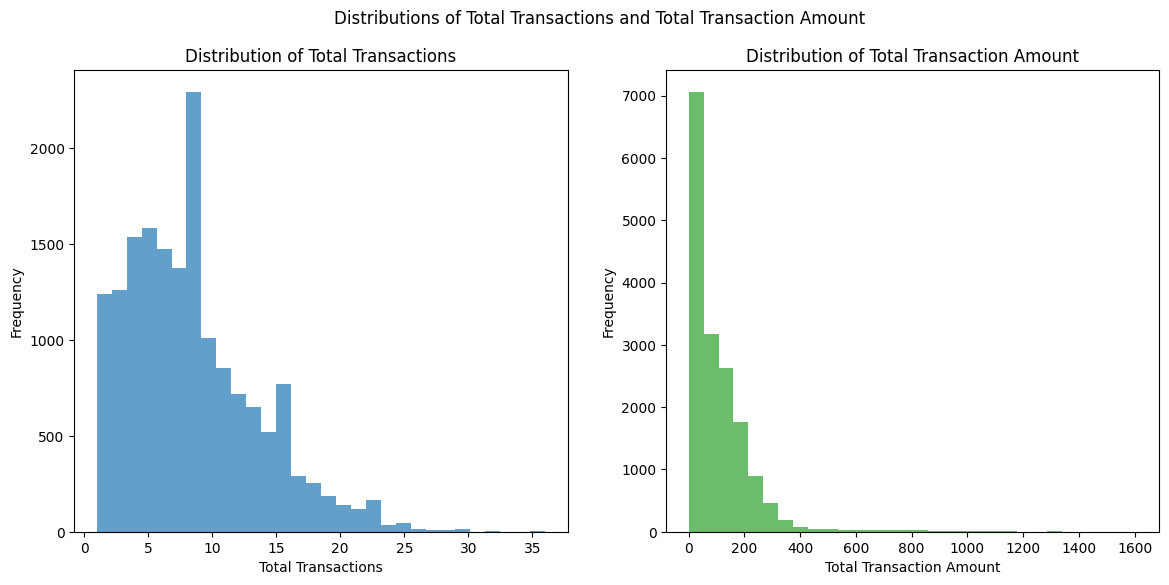

In [13]:
#num binds
num_bins1 = 30
num_bins2 = 30

# Using the square root rule to determine the number of bins returns 128 which is too many bins
# num_bins1 = int(np.sqrt(len(transactions_per_cust['total_transactions'])))
# num_bins2 = int(np.sqrt(len(transactions_per_cust['total_transaction_amount'])))

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram for total_transactions
ax1.hist(transactions_per_cust['total_transactions'], bins=num_bins1, alpha=0.7, color='tab:blue')
ax1.set_xlabel('Total Transactions')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Total Transactions')

# Plot the histogram for total_transaction_amount
ax2.hist(transactions_per_cust['total_transaction_amount'], bins=num_bins2, alpha=0.7, color='tab:green')
ax2.set_xlabel('Total Transaction Amount')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Total Transaction Amount')

# Add a title for the whole figure
fig.suptitle('Distributions of Total Transactions and Total Transaction Amount')

# Show the plots
plt.show()

# Take a Look at Outliers

In [14]:
# It looks like several people are spending over $1000
transactions_per_cust.sort_values(by='total_transaction_amount', ascending=False).head()

,customer_id,total_transactions,total_transaction_amount
3929,3c8d541112a74af99e88abbd0692f00e,8,1608.69
15693,f1d65ae63f174b8f80fa063adcaa63b7,13,1365.66
11422,ae6f43089b674728a50b8727252d3305,16,1327.74
6366,626df8678e2a4953b9098246418c9cfa,13,1321.42
7492,73afdeca19e349b98f09e928644610f8,10,1319.97


In [15]:
#Count the number of customer_ids with total_transaction_amount > 1000
transactions_per_cust[transactions_per_cust['total_transaction_amount'] > 1000].count()

customer_id                 48
total_transactions          48
total_transaction_amount    48
dtype: int64

In [16]:
num_transactions = len(transactions_per_cust)

num_transactions_over_150 = transactions[transactions['transaction_amount'] > 150].count()
print(f'There are {num_transactions_over_150.iloc[0]} transactions over $150')
percent_transactions_over_150 = round((num_transactions_over_150.iloc[0] / num_transactions) * 100, 2)
print(f'This is {percent_transactions_over_150}% of all transactions')

There are 385 transactions over $150
This is 2.32% of all transactions


In [17]:
#Filter transactions on customer_id = 3c8d541112a74af99e88abbd0692f00e
example_customer = transactions[transactions['customer_id'] == 'ae6f43089b674728a50b8727252d3305']
example_customer.sort_values(by='transaction_amount', ascending=False).head()

,customer_id,transaction,transaction_amount
95035,ae6f43089b674728a50b8727252d3305,240,601.64
95032,ae6f43089b674728a50b8727252d3305,180,451.96
95041,ae6f43089b674728a50b8727252d3305,492,30.27
95037,ae6f43089b674728a50b8727252d3305,306,24.95
95034,ae6f43089b674728a50b8727252d3305,222,23.06


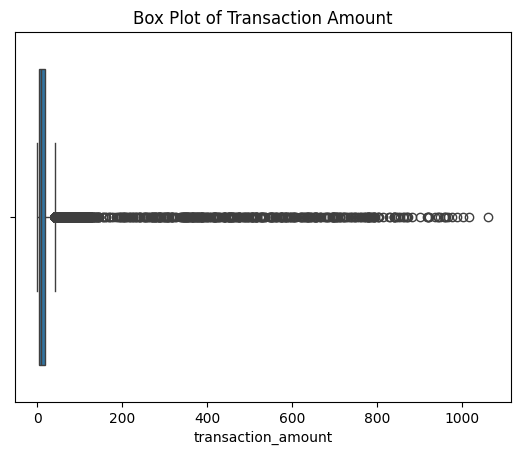

In [18]:
# Create the box plot
sns.boxplot(x=transactions['transaction_amount'])

# Set the title
plt.title('Box Plot of Transaction Amount')

# Show the plot
plt.show()